## Latar Belakang

Pada era jaman sekarang, persaingan antara toko pakaian semakin ketat. Oleh karena itu dibutuhkan analisis terhadap produk yang sedang trend pada toko pakaian, salah satunya adalah toko pakaian H&M.

Dataset ini berasal dari https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data

Analisis ini berfokus kepada dataset "articles.csv"

Pada dataset ini terdapat beberapa column, yaitu :
- article_id : kode unik untu setiap article.
- product_code, prod_name : Pengenal unik setiap produk beserta namanya (tidak sama).
- product_type, product_type_name : Grup kode_produk dan namanya
- graphical_appearance_no, graphical_appearance_name : Kelompok grafik dan namanya
- colour_group_code, colour_group_name : Kelompok warna dan namanya
- perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : Info warna tambahan
- department_no, department_name: : Pengidentifikasi unik setiap dep dan namanya
- index_code, index_name: : Pengidentifikasi unik dari setiap indeks dan namanya
- index_group_no, index_group_name: : Sekelompok indeks dan namanya
- section_no, section_name: : Pengidentifikasi unik setiap bagian dan namanya
- garment_group_no, garment_group_name: : Pengidentifikasi unik setiap pakaian dan namanya
- detail_desc: : Detail

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
articles = pd.read_csv('articles.csv')

In [5]:
articles.head() #Menampilkan 5 baris teratas

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
articles.tail()  #Menampilkan 5 baris terbawah

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
22585,599090026,599090,SARA cycle shorts,273,Leggings/Tights,Garment Lower body,1010016,Solid,61,Light Purple,...,Kids Girl Jersey Basic,H,Children Sizes 92-140,4.0,Baby/Children,79.0,Girls Underwear & Basics,1002.0,Jersey Basic,Short cycling shorts in soft organic cotton je...
22586,599102001,599102,Polly dress,265,Dress,Garment Full body,1010016,Solid,93,Dark Green,...,Blouse & Dress,A,Ladieswear,1.0,Ladieswear,18.0,Womens Trend,1010.0,Blouses,Knee-length dress in a crêpe weave with a stan...
22587,599105002,599105,Betty Puffsleeve NT,254,Top,Garment Upper body,1010001,All over pattern,73,Dark Blue,...,Nursing,A,Ladieswear,1.0,Ladieswear,8.0,Mama,1005.0,Jersey Fancy,Top in soft viscose jersey with a unique nursi...
22588,599147004,599147,LISA tee (1),255,T-shirt,Garment Upper body,1010016,Solid,82,Turquoise,...,Kids Girl Jersey Basic,H,Children Sizes 92-140,4.0,Baby/Children,79.0,Girls Underwear & Basics,1002.0,Jersey Basic,T-shirt in organic cotton jersey with dolman s...
22589,599182001,599182,Ben long sleeve,254,Top,Garment Upper body,1010016,Solid,9,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
articles.shape #Melihat jumlah baris dan kolom

(22590, 25)

In [8]:
articles.size #Melihat ukuran tabel (baris x kolom)

564750

In [9]:
articles.columns #Menampilkan nama kolom

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [10]:
articles.dtypes #Menampilkan tipe data

article_id                        int64
product_code                      int64
prod_name                        object
product_type_no                   int64
product_type_name                object
product_group_name               object
graphical_appearance_no           int64
graphical_appearance_name        object
colour_group_code                 int64
colour_group_name                object
perceived_colour_value_id         int64
perceived_colour_value_name      object
perceived_colour_master_id      float64
perceived_colour_master_name     object
department_no                   float64
department_name                  object
index_code                       object
index_name                       object
index_group_no                  float64
index_group_name                 object
section_no                      float64
section_name                     object
garment_group_no                float64
garment_group_name               object
detail_desc                      object


In [11]:
articles.info() #Menampilkan indeks, tipe data setiap nama kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22590 entries, 0 to 22589
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   article_id                    22590 non-null  int64  
 1   product_code                  22590 non-null  int64  
 2   prod_name                     22590 non-null  object 
 3   product_type_no               22590 non-null  int64  
 4   product_type_name             22590 non-null  object 
 5   product_group_name            22590 non-null  object 
 6   graphical_appearance_no       22590 non-null  int64  
 7   graphical_appearance_name     22590 non-null  object 
 8   colour_group_code             22590 non-null  int64  
 9   colour_group_name             22590 non-null  object 
 10  perceived_colour_value_id     22590 non-null  int64  
 11  perceived_colour_value_name   22589 non-null  object 
 12  perceived_colour_master_id    22589 non-null  float64
 13  p

In [12]:
articles.describe() #Menampilkan informasi statistik

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,2.259000e+04,22590.000000,22590.000000,2.259000e+04,22590.000000,22590.000000,22589.000000,22589.000000,22589.000000,22589.000000,22589.000000
mean,5.179588e+08,517958.746304,239.528243,1.009342e+06,34.462815,3.298185,7.720926,4680.580415,3.443446,43.433707,1010.511621
std,8.429675e+07,84296.756483,73.203807,2.601839e+04,28.937546,1.539761,5.551842,2714.014155,4.919968,23.129056,6.934023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,4.980610e+08,498061.000000,252.000000,1.010010e+06,9.000000,2.000000,4.000000,1722.000000,1.000000,21.000000,1005.000000
50%,5.468955e+08,546895.500000,262.000000,1.010016e+06,19.000000,4.000000,5.000000,4242.000000,3.000000,47.000000,1009.000000
75%,5.722235e+08,572223.500000,273.000000,1.010016e+06,71.000000,4.000000,12.000000,7616.000000,4.000000,61.000000,1017.000000
max,5.991820e+08,599182.000000,532.000000,1.010028e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [13]:
articles.describe(include='all')

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
count,2.259000e+04,22590.000000,22590,22590.000000,22590,22590,2.259000e+04,22590,22590.000000,22590,...,22589,22589,22589,22589.000000,22589,22589.000000,22589,22589.000000,22589,22379
unique,NaN,NaN,9235,NaN,96,13,NaN,29,NaN,50,...,217,10,10,NaN,5,NaN,54,NaN,21,8136
top,NaN,NaN,R-NECK SS SLIM FIT,NaN,Trousers,Garment Upper body,NaN,Solid,NaN,Black,...,Knitwear,A,Ladieswear,NaN,Ladieswear,NaN,Divided Collection,NaN,Jersey Fancy,Trunks in stretch cotton jersey with flatlock ...
freq,NaN,NaN,42,NaN,2826,9361,NaN,10596,NaN,4855,...,884,4519,4519,NaN,7905,NaN,1626,NaN,3661,50
mean,5.179588e+08,517958.746304,NaN,239.528243,NaN,NaN,1.009342e+06,NaN,34.462815,NaN,...,NaN,NaN,NaN,3.443446,NaN,43.433707,NaN,1010.511621,NaN,NaN
std,8.429675e+07,84296.756483,NaN,73.203807,NaN,NaN,2.601839e+04,NaN,28.937546,NaN,...,NaN,NaN,NaN,4.919968,NaN,23.129056,NaN,6.934023,NaN,NaN
min,1.087750e+08,108775.000000,NaN,-1.000000,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,2.000000,NaN,1001.000000,NaN,NaN
25%,4.980610e+08,498061.000000,NaN,252.000000,NaN,NaN,1.010010e+06,NaN,9.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,21.000000,NaN,1005.000000,NaN,NaN
50%,5.468955e+08,546895.500000,NaN,262.000000,NaN,NaN,1.010016e+06,NaN,19.000000,NaN,...,NaN,NaN,NaN,3.000000,NaN,47.000000,NaN,1009.000000,NaN,NaN
75%,5.722235e+08,572223.500000,NaN,273.000000,NaN,NaN,1.010016e+06,NaN,71.000000,NaN,...,NaN,NaN,NaN,4.000000,NaN,61.000000,NaN,1017.000000,NaN,NaN


In [14]:
articles.nunique() #Menemukan berapa banyak nilai unik yang ada di dalam dataset

article_id                      22590
product_code                     8552
prod_name                        9235
product_type_no                    97
product_type_name                  96
product_group_name                 13
graphical_appearance_no            29
graphical_appearance_name          29
colour_group_code                  50
colour_group_name                  50
perceived_colour_value_id           8
perceived_colour_value_name         8
perceived_colour_master_id         18
perceived_colour_master_name       18
department_no                     263
department_name                   217
index_code                         10
index_name                         10
index_group_no                      5
index_group_name                    5
section_no                         54
section_name                       54
garment_group_no                   21
garment_group_name                 21
detail_desc                      8136
dtype: int64

## Data Preparation (Data Cleaning)

In [15]:
articles.isnull()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
miss=articles.isnull().sum()  #Menampilkan jumlah nilai null
miss

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       1
perceived_colour_master_id        1
perceived_colour_master_name      1
department_no                     1
department_name                   1
index_code                        1
index_name                        1
index_group_no                    1
index_group_name                  1
section_no                        1
section_name                      1
garment_group_no                  1
garment_group_name                1
detail_desc                     211
dtype: int64

<Axes: >

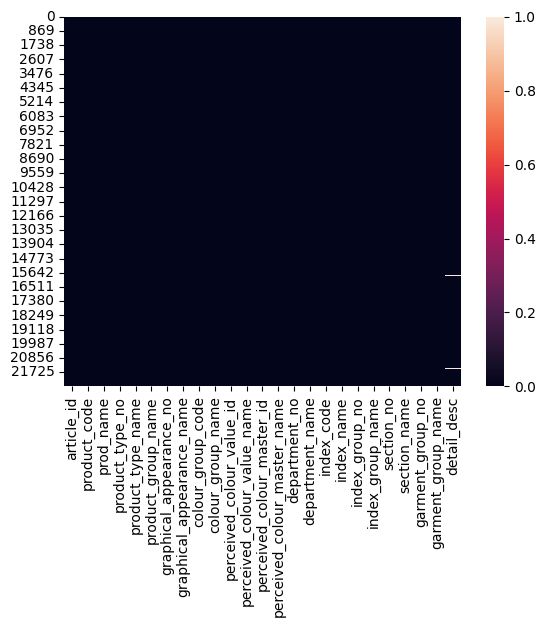

In [17]:
sns.heatmap(articles.isnull())  #Menggunakan heatmap untuk menunjukkan nilai null

Berdasarkan heatmap diatas, terdapat nilai null di detail_desc

In [18]:
articles.detail_desc.value_counts() #menampilkan data paling tinggi nilainya

Trunks in stretch cotton jersey with flatlock seams, short legs, an elasticated waist and a lined front.                                                                                                   50
Sleeveless bodysuits in soft organic cotton jersey with press-studs at the crotch.                                                                                                                         45
Jacket in sweatshirt fabric with a lined hood, zip down the front, front pockets and ribbing at the cuffs and hem. Soft brushed inside. The cotton content of the jacket is organic.                       43
5-pocket jeans in washed, superstretch denim with a regular waist, zip fly and button, and skinny legs.                                                                                                    41
Round-necked T-shirt in soft jersey.                                                                                                                                            

In [19]:
articles.fillna(value="0", inplace=True)

In [20]:
articles.isna().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

<Axes: >

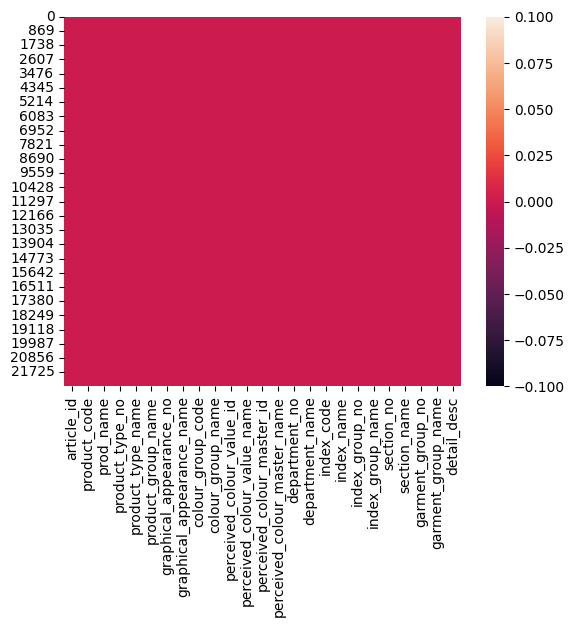

In [21]:
sns.heatmap(articles.isnull()) #Memeriksa kembali data null dengan heatmap

Heatmap diatas tidak menunjukkan nilai null

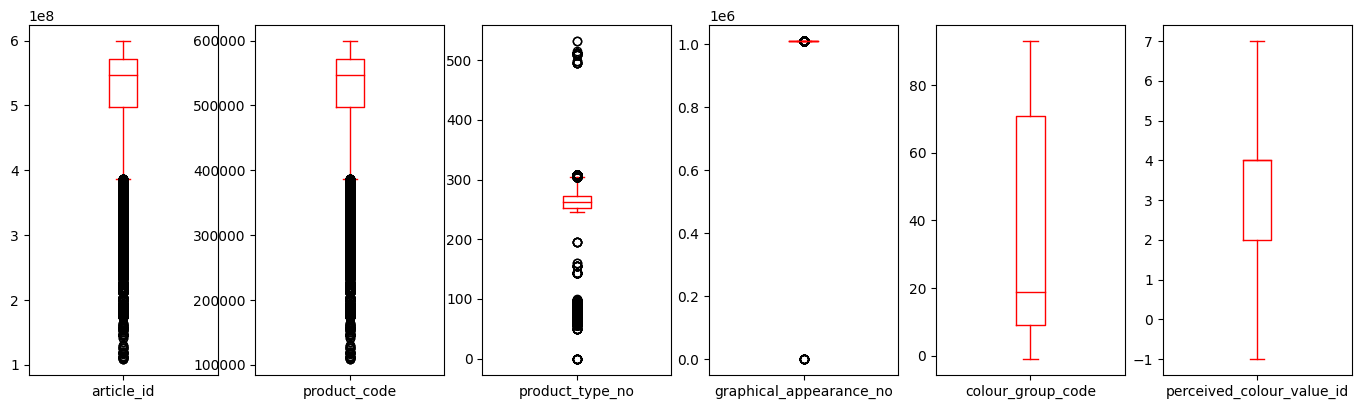

In [23]:
# Menampilkan boxplot untuk melihat outliers data numerik
articles.plot(kind = 'box',subplots = True,layout = (2,7),sharex = False,sharey = False,figsize = (20, 10),color = 'r')
plt.show()

Outlier yang ditunjukkan pada diatas merupakan kode unik, sehingga tidak dapat dikategorikan sebagai outlier

### Data Preprocessing

In [24]:
articles[articles.duplicated()]   #Menampilkan baris yang duplikat

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


In [25]:
#Menampilkan jumlah baris yang duplikat
articles.duplicated().sum()

0

### Index Pakaian apa yang paling tinggi penjualannya pada dataset tersebut?

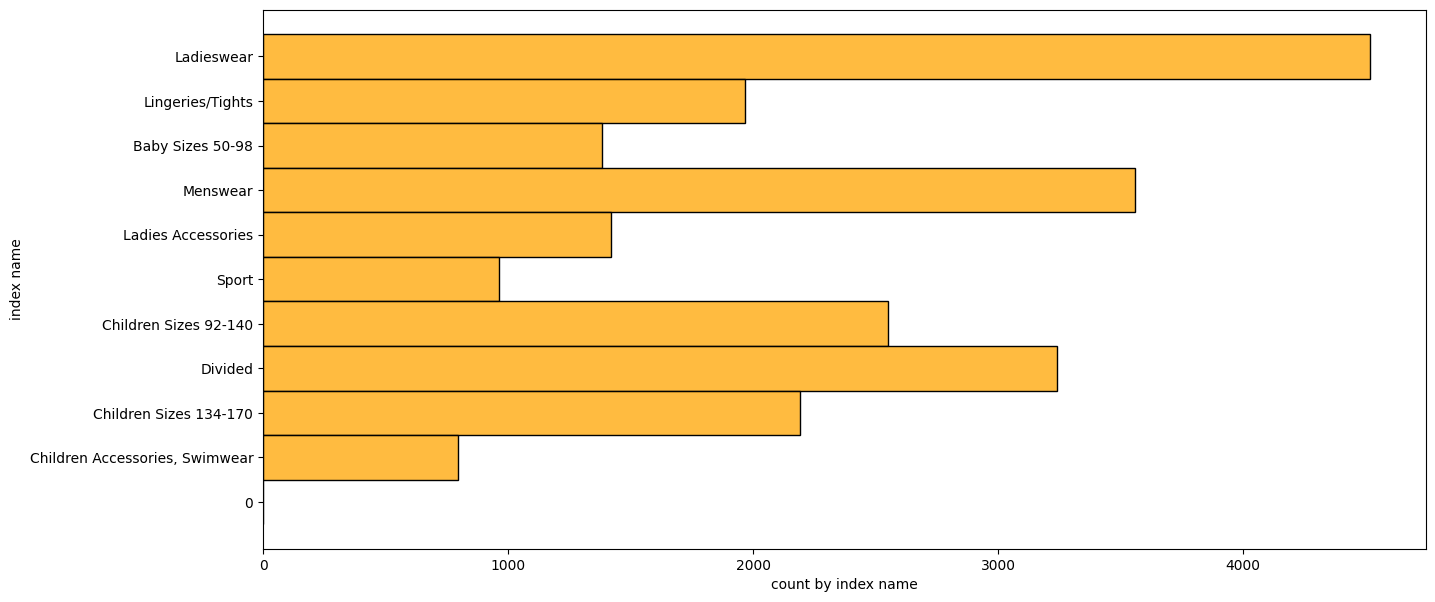

In [26]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

### Garmen Pakaian apa yang paling tinggi penjualannya dalam dataset tersebut?

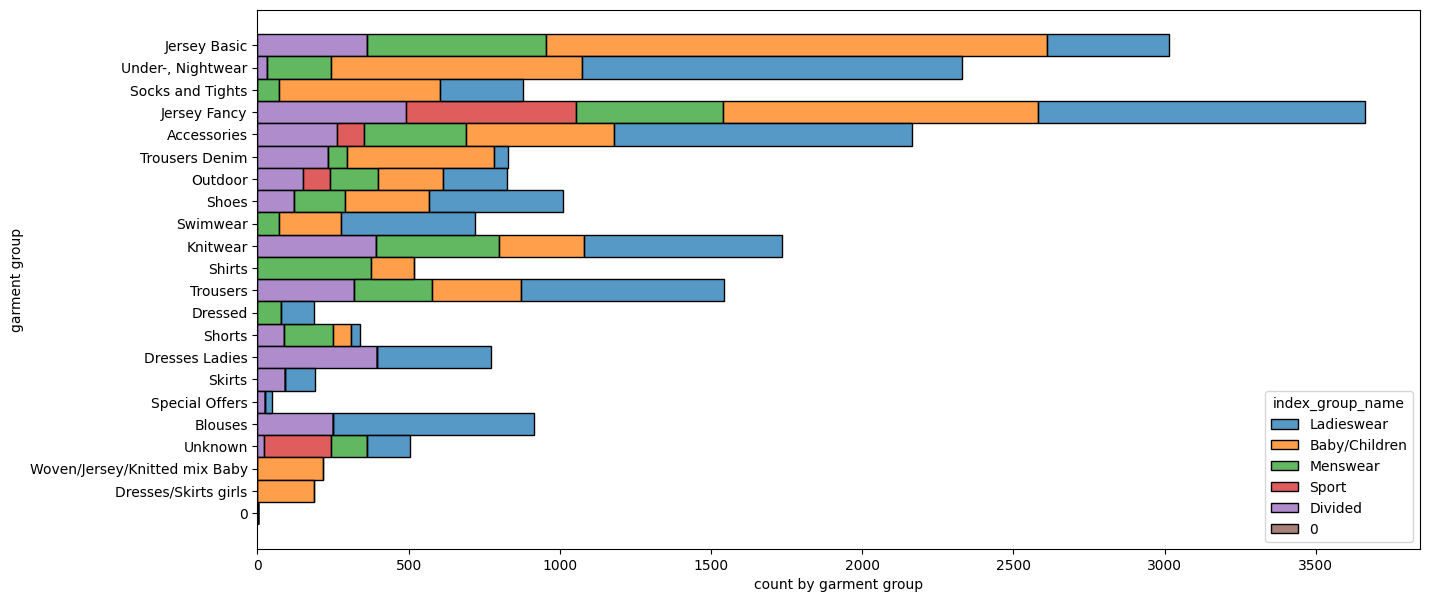

In [27]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

### Bagaimana dengan pembagian penjualan dalam Index Group Name?

In [28]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
0                 0                                    1
Baby/Children     Baby Sizes 50-98                  1384
                  Children Accessories, Swimwear     795
                  Children Sizes 134-170            2191
                  Children Sizes 92-140             2550
Divided           Divided                           3242
Ladieswear        Ladies Accessories                1420
                  Ladieswear                        4519
                  Lingeries/Tights                  1966
Menswear          Menswear                          3559
Sport             Sport                              963
Name: article_id, dtype: int64

### Bagaimana dengan variasi pakaian yang ada?

In [29]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name   product_type_name       
Accessories          Alice band                     2
                     Bag                          199
                     Beanie                         4
                     Belt                         121
                     Bracelet                      23
                     Braces                         2
                     Cap/peaked                   116
                     Earring                      117
                     Felt hat                       5
                     Giftbox                        2
                     Gloves                        63
                     Hair clip                     35
                     Hair string                   67
                     Hair ties                     11
                     Hair/alice band              127
                     Hat/beanie                   336
                     Hat/brim                      78
                     Necklace       